# Import Libraries

In [1]:
import numpy as np #Linear algebra
import pandas as pd #Read csv file

import matplotlib.pyplot as plt #Visualize
import plotly.express as px

from mlxtend.frequent_patterns import apriori, association_rules #Import training model

In [2]:
pd.set_option('display.max_columns', None) #Show all the columns of dataframe 

# Import Dataset

In [3]:
df = pd.read_csv('Groceries_dataset.csv', parse_dates = ['Date']) #Formart date: [yyyy mm dd] with parse_dates

/Users/nguyenhuyhai/opt/anaconda3/envs/Sea/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '21-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/nguyenhuyhai/opt/anaconda3/envs/Sea/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '19-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/nguyenhuyhai/opt/anaconda3/envs/Sea/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '14-02-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/nguyenhuyhai/opt/anaconda3/envs/Sea/lib/python3.10/site-packages/p

In [4]:
df #Read first 10 rows

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk
...,...,...,...
38760,4471,2014-08-10,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-03-12,fruit/vegetable juice


In [5]:
df.shape #Total rows and columns of dataframe
#The dataset has 38765 rows of the purchase orders of people from the grocery stores

(38765, 3)

# Data Preprocessing

In [6]:
df.isna().sum() #Check null values

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [7]:
list = []
for i in df['itemDescription']:
    list.append(i)
list # Gather All Items of Each Transactions into Numpy Array

['tropical fruit',
 'whole milk',
 'pip fruit',
 'other vegetables',
 'whole milk',
 'rolls/buns',
 'other vegetables',
 'pot plants',
 'whole milk',
 'tropical fruit',
 'citrus fruit',
 'beef',
 'frankfurter',
 'chicken',
 'butter',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk',
 'whole milk',
 'tropical fruit',
 'tropical fruit',
 'bottled water',
 'yogurt',
 'sausage',
 'other vegetables',
 'brown bread',
 'yogurt',
 'hamburger meat',
 'root vegetables',
 'pork',
 'beef',
 'pastry',
 'fruit/vegetable juice',
 'canned beer',
 'root vegetables',
 'citrus fruit',
 'sausage',
 'tropical fruit',
 'berries',
 'canned beer',
 'butter milk',
 'coffee',
 'pastry',
 'rolls/buns',
 'misc. beverages',
 'root vegetables',
 'sausage',
 'canned beer',
 'ham',
 'turkey',
 'whole milk',
 'whole milk',
 'packaged fruit/vegetables',
 'rolls/buns',
 'ham',
 'rolls/buns',
 'other vegetables',
 'sausage',
 'sausage',
 'frankfur

In [8]:
array = np.array(list)
array # converting to numpy array

array(['tropical fruit', 'whole milk', 'pip fruit', ..., 'cake bar',
       'fruit/vegetable juice', 'cat food'], dtype='<U25')

In [9]:
df1 = pd.DataFrame(array, columns = ["items"]) #  Transform Them a Pandas DataFrame
df1["incident_count"] = 1 # Put 1 to Each Item For Making Countable Table, to be able to perform Group By
df1

,items,incident_count
0,tropical fruit,1
1,whole milk,1
2,pip fruit,1
3,other vegetables,1
4,whole milk,1
...,...,...
38760,sliced cheese,1
38761,candy,1
38762,cake bar,1
38763,fruit/vegetable juice,1


In [10]:
count_items = df1.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
count_items # Making a New Appropriate Pandas DataFrame for Visualizations

,items,incident_count
0,whole milk,2502
1,other vegetables,1898
2,rolls/buns,1716
3,soda,1514
4,yogurt,1334
...,...,...
162,rubbing alcohol,5
163,bags,4
164,baby cosmetics,3
165,preservation products,1


# EDA

Text(0.5, 1.0, 'Top 10 selling items')

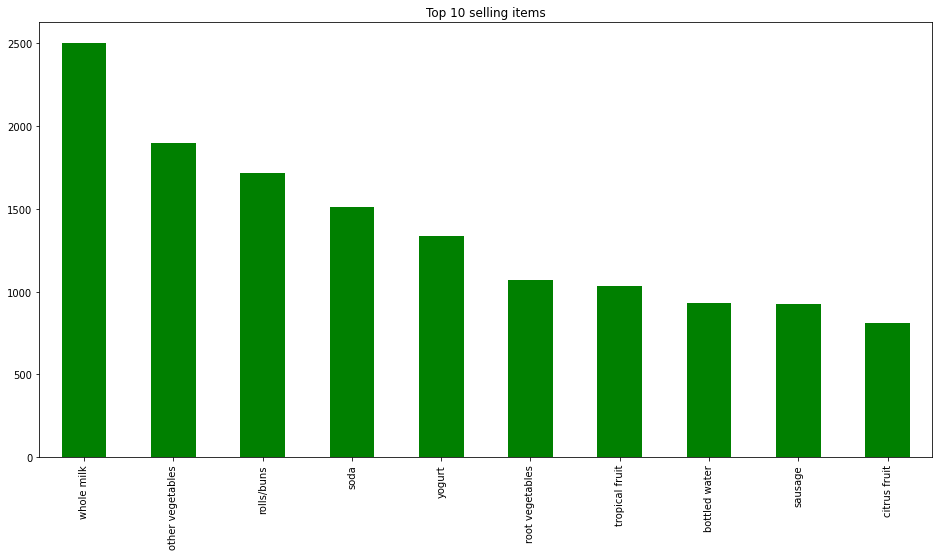

In [11]:
plt.figure(figsize = (16,8)) #Set the size of the chart
df['itemDescription'].value_counts().head(10).plot.bar(color = 'Green') #Count value of each item that the customers purchased, first 10 items
plt.title('Top 10 selling items') #Change the title name of the chart

Text(0.5, 1.0, 'Top 10 least selling items')

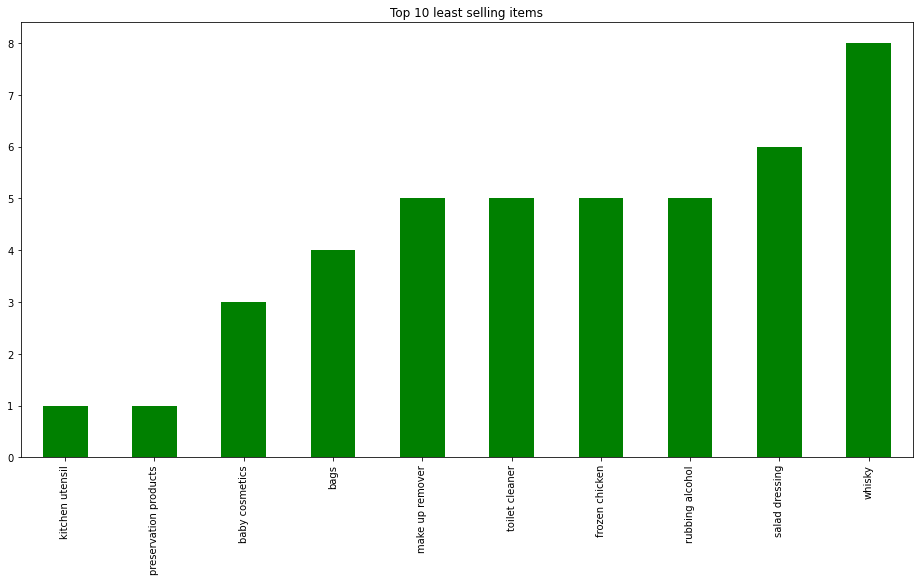

In [12]:
plt.figure(figsize = (16,8))
df.itemDescription.value_counts().tail(10).sort_values().plot.bar(color = 'Green') #Visual last 10 items
plt.title('Top 10 least selling items')

Text(0.5, 1.0, 'Top 10 customers')

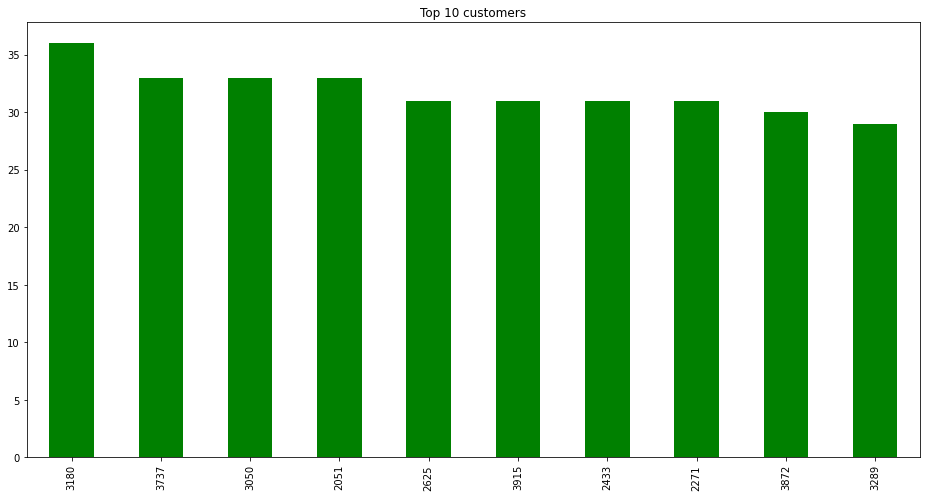

In [13]:
plt.figure(figsize = (16,8))
df['Member_number'].value_counts().head(10).plot.bar(color = 'Green')
plt.title('Top 10 customers')

In [14]:
count_items.head(20).style.background_gradient(cmap='Greens') #Initial visualizations


,items,incident_count
0,whole milk,2502
1,other vegetables,1898
2,rolls/buns,1716
3,soda,1514
4,yogurt,1334
5,root vegetables,1071
6,tropical fruit,1032
7,bottled water,933
8,sausage,924
9,citrus fruit,812


In [15]:
count_items["Tree_map"] = "Tree_map" #To have a same origin

fig = px.treemap(count_items.head(20), path = ['Tree_map', "items"], values = 'incident_count', 
                color = count_items["incident_count"].head(20), hover_data = ['items'], color_continuous_scale = 'Greens', )
fig.show() #Create a tree map

/Users/nguyenhuyhai/opt/anaconda3/envs/Sea/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/nguyenhuyhai/opt/anaconda3/envs/Sea/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



# Apriori Implementation

In [16]:
all_products = df['itemDescription'].unique()

In [18]:
one_hot = pd.get_dummies(df['itemDescription']) #Create dummies
df.drop('itemDescription', inplace=True, axis=1) #Delete duplicate, inplace=true to permanently delete, axis=1 to delete column
df2 = df.join(one_hot) #Merge dummy table vs dataset


In [19]:
df2

,Member_number,Date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,finished products,fish,flour,flower (seeds),flower soil/fertilizer,frankfurter,frozen chicken,frozen dessert,frozen fish,frozen fruits,frozen meals,frozen potato products,frozen vegetables,fruit/vegetable juice,grapes,hair spray,ham,hamburger meat,hard cheese,herbs,honey,house keeping products,hygiene articles,ice cream,instant coffee,jam,ketchup,kitchen towels,kitchen utensil,light bulbs,liqueur,liquor,liquor (appetizer),liver loaf,long life bakery product,make up remover,male cosmetics,margarine,mayonnaise,meat,meat spreads,misc. beverages,mustard,napkins,newspapers,nut snack,nuts/prunes,oil,onions,organic products,organic sausage,other vegetables,packaged fruit/vegetables,pasta,pastry,pet care,photo/film,pickled vegetables,pip fruit,popcorn,pork,pot plants,potato products,preservation products,processed cheese,prosecco,pudding powder,ready soups,red/blush wine,rice,roll products,rolls/buns,root vegetables,rubbing alcohol,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,2015-07-21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2552,2015-05-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2300,2015-09-19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1187,2015-12-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3037,2015-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [20]:
records = df2.groupby(["Member_number","Date"])[all_products[:]].apply(sum) #Create transactions
#If a person buy many products in a day, so all of this products are considered to be a transaction
records = records.reset_index()[all_products]
baskets = records
records.head(10)

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,butter,fruit/vegetable juice,packaged fruit/vegetables,chocolate,specialty bar,butter milk,bottled water,yogurt,sausage,brown bread,hamburger meat,root vegetables,pork,pastry,canned beer,berries,coffee,misc. beverages,ham,turkey,curd cheese,red/blush wine,frozen potato products,flour,sugar,frozen meals,herbs,soda,detergent,grapes,processed cheese,fish,sparkling wine,newspapers,curd,pasta,popcorn,finished products,beverages,bottled beer,dessert,dog food,specialty chocolate,condensed milk,cleaner,white wine,meat,ice cream,hard cheese,cream cheese,liquor,pickled vegetables,liquor (appetizer),UHT-milk,candy,onions,hair spray,photo/film,domestic eggs,margarine,shopping bags,salt,oil,whipped/sour cream,frozen vegetables,sliced cheese,dish cleaner,baking powder,specialty cheese,salty snack,Instant food products,pet care,white bread,female sanitary products,cling film/bags,soap,frozen chicken,house keeping products,spread cheese,decalcifier,frozen dessert,vinegar,nuts/prunes,potato products,frozen fish,hygiene articles,artif. sweetener,light bulbs,canned vegetables,chewing gum,canned fish,cookware,semi-finished bread,cat food,bathroom cleaner,prosecco,liver loaf,zwieback,canned fruit,frozen fruits,brandy,baby cosmetics,spices,napkins,waffles,sauces,rum,chocolate marshmallow,long life bakery product,bags,sweet spreads,soups,mustard,specialty fat,instant coffee,snack products,organic sausage,soft cheese,mayonnaise,dental care,roll products,kitchen towels,flower soil/fertilizer,cereals,meat spreads,dishes,male cosmetics,candles,whisky,tidbits,cooking chocolate,seasonal products,liqueur,abrasive cleaner,syrup,ketchup,cream,skin care,rubbing alcohol,nut snack,cocoa drinks,softener,organic products,cake bar,honey,jam,kitchen utensil,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [32]:
records

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,butter,fruit/vegetable juice,packaged fruit/vegetables,chocolate,specialty bar,butter milk,bottled water,yogurt,sausage,brown bread,hamburger meat,root vegetables,pork,pastry,canned beer,berries,coffee,misc. beverages,ham,turkey,curd cheese,red/blush wine,frozen potato products,flour,sugar,frozen meals,herbs,soda,detergent,grapes,processed cheese,fish,sparkling wine,newspapers,curd,pasta,popcorn,finished products,beverages,bottled beer,dessert,dog food,specialty chocolate,condensed milk,cleaner,white wine,meat,ice cream,hard cheese,cream cheese,liquor,pickled vegetables,liquor (appetizer),UHT-milk,candy,onions,hair spray,photo/film,domestic eggs,margarine,shopping bags,salt,oil,whipped/sour cream,frozen vegetables,sliced cheese,dish cleaner,baking powder,specialty cheese,salty snack,Instant food products,pet care,white bread,female sanitary products,cling film/bags,soap,frozen chicken,house keeping products,spread cheese,decalcifier,frozen dessert,vinegar,nuts/prunes,potato products,frozen fish,hygiene articles,artif. sweetener,light bulbs,canned vegetables,chewing gum,canned fish,cookware,semi-finished bread,cat food,bathroom cleaner,prosecco,liver loaf,zwieback,canned fruit,frozen fruits,brandy,baby cosmetics,spices,napkins,waffles,sauces,rum,chocolate marshmallow,long life bakery product,bags,sweet spreads,soups,mustard,specialty fat,instant coffee,snack products,organic sausage,soft cheese,mayonnaise,dental care,roll products,kitchen towels,flower soil/fertilizer,cereals,meat spreads,dishes,male cosmetics,candles,whisky,tidbits,cooking chocolate,seasonal products,liqueur,abrasive cleaner,syrup,ketchup,cream,skin care,rubbing alcohol,nut snack,cocoa drinks,softener,organic products,cake bar,honey,jam,kitchen utensil,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [21]:
first50 = count_items["items"].head(50).values #Select top 50 items
dataset = records.loc[:,first50] #Extract Top50
dataset.shape

(14963, 50)

In [22]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1: 
        return 1 

datasets = dataset.applymap(encode_units)
datasets #Encode 0 & 1 format

,whole milk,other vegetables,rolls/buns,soda,yogurt,root vegetables,tropical fruit,bottled water,sausage,citrus fruit,pastry,pip fruit,shopping bags,canned beer,bottled beer,whipped/sour cream,newspapers,frankfurter,brown bread,domestic eggs,pork,butter,fruit/vegetable juice,beef,curd,margarine,coffee,frozen vegetables,chicken,white bread,cream cheese,chocolate,dessert,napkins,hamburger meat,berries,UHT-milk,onions,salty snack,waffles,long life bakery product,sugar,butter milk,ham,meat,frozen meals,beverages,specialty chocolate,misc. beverages,ice cream
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
14961,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
frequent_itemsets = apriori(datasets, min_support=0.0003, use_colnames=True) # Extracting the most frequest itemsets via Mlxtend.
frequent_itemsets

/Users/nguyenhuyhai/opt/anaconda3/envs/Sea/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,0.157923,(whole milk)
1,0.122101,(other vegetables)
2,0.110005,(rolls/buns)
3,0.097106,(soda)
4,0.085879,(yogurt)
...,...,...
1439,0.000334,"(fruit/vegetable juice, curd, sausage)"
1440,0.000334,"(margarine, curd, sausage)"
1441,0.000334,"(brown bread, frozen vegetables, canned beer)"
1442,0.000334,"(other vegetables, soda, pastry, whole milk)"


In [24]:
# The length column has been added to increase ease of filtering.
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.157923,(whole milk),1
1,0.122101,(other vegetables),1
2,0.110005,(rolls/buns),1
3,0.097106,(soda),1
4,0.085879,(yogurt),1
...,...,...,...
1439,0.000334,"(fruit/vegetable juice, curd, sausage)",3
1440,0.000334,"(margarine, curd, sausage)",3
1441,0.000334,"(brown bread, frozen vegetables, canned beer)",3
1442,0.000334,"(other vegetables, soda, pastry, whole milk)",4


In [25]:
# printing the frequntly items with length 2
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.0003) ]

,support,itemsets,length
50,0.014837,"(other vegetables, whole milk)",2
51,0.013968,"(rolls/buns, whole milk)",2
52,0.011629,"(soda, whole milk)",2
53,0.011161,"(yogurt, whole milk)",2
54,0.007552,"(root vegetables, whole milk)",2
...,...,...,...
1104,0.000334,"(frozen meals, meat)",2
1105,0.000468,"(beverages, meat)",2
1106,0.000334,"(frozen meals, beverages)",2
1107,0.000468,"(specialty chocolate, frozen meals)",2


In [26]:
# printing the frequntly items with length 3
frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.0003)]

,support,itemsets,length
1109,0.001203,"(other vegetables, rolls/buns, whole milk)",3
1110,0.001136,"(other vegetables, soda, whole milk)",3
1111,0.001136,"(other vegetables, yogurt, whole milk)",3
1112,0.000668,"(other vegetables, root vegetables, whole milk)",3
1113,0.000735,"(tropical fruit, other vegetables, whole milk)",3
...,...,...,...
1437,0.000334,"(frozen vegetables, canned beer, sausage)",3
1438,0.000334,"(butter, bottled beer, sausage)",3
1439,0.000334,"(fruit/vegetable juice, curd, sausage)",3
1440,0.000334,"(margarine, curd, sausage)",3


In [27]:
# printing the frequntly items with length 4
frequent_itemsets[ (frequent_itemsets['length'] == 4) &
                   (frequent_itemsets['support'] >= 0.0003)]

,support,itemsets,length
1442,0.000334,"(other vegetables, soda, pastry, whole milk)",4
1443,0.000334,"(rolls/buns, yogurt, sausage, whole milk)",4


In [28]:
#  We set our metric as "Lift" to define whether antecedents & consequents are dependent our not
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift", ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
1117,(sausage),"(fruit/vegetable juice, curd)",0.060349,0.000668,0.000334,0.005537,8.285161,0.000294,1.004896,1,2
1112,"(fruit/vegetable juice, curd)",(sausage),0.000668,0.060349,0.000334,0.500000,8.285161,0.000294,1.879302,2,1
1138,"(soda, whole milk)","(other vegetables, pastry)",0.011629,0.003676,0.000334,0.028736,7.817659,0.000291,1.025801,2,2
1135,"(other vegetables, pastry)","(soda, whole milk)",0.003676,0.011629,0.000334,0.090909,7.817659,0.000291,1.087208,2,2
1124,"(brown bread, frozen vegetables)",(canned beer),0.000936,0.046916,0.000334,0.357143,7.612434,0.000290,1.482576,2,1
1129,(canned beer),"(brown bread, frozen vegetables)",0.046916,0.000936,0.000334,0.007123,7.612434,0.000290,1.006231,1,2
1126,"(frozen vegetables, canned beer)",(brown bread),0.001337,0.037626,0.000334,0.250000,6.644316,0.000284,1.283165,2,1
1127,(brown bread),"(frozen vegetables, canned beer)",0.037626,0.001337,0.000334,0.008881,6.644316,0.000284,1.007612,1,2
1131,"(other vegetables, soda, whole milk)",(pastry),0.001136,0.051728,0.000334,0.294118,5.685895,0.000275,1.343386,3,1
1142,(pastry),"(other vegetables, soda, whole milk)",0.051728,0.001136,0.000334,0.006460,5.685895,0.000275,1.005358,1,3


In [29]:
# Sort values based on confidence
rules.sort_values("confidence", ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
1130,"(other vegetables, pastry, soda)",(whole milk),0.000401,0.157923,0.000334,0.833333,5.276837,0.000271,5.052463,3,1
1144,"(rolls/buns, yogurt, sausage)",(whole milk),0.000601,0.157923,0.000334,0.555556,3.517892,0.000239,1.894674,3,1
840,"(pip fruit, ice cream)",(rolls/buns),0.000668,0.110005,0.000334,0.500000,4.545261,0.000261,1.779991,2,1
1132,"(other vegetables, pastry, whole milk)",(soda),0.000668,0.097106,0.000334,0.500000,5.149002,0.000269,1.805788,3,1
1112,"(fruit/vegetable juice, curd)",(sausage),0.000668,0.060349,0.000334,0.500000,8.285161,0.000294,1.879302,2,1
1059,"(canned beer, butter milk)",(yogurt),0.000802,0.085879,0.000334,0.416667,4.851816,0.000265,1.567065,2,1
658,"(waffles, sausage)",(other vegetables),0.000802,0.122101,0.000334,0.416667,3.412470,0.000236,1.504969,2,1
298,"(pork, sausage)",(whole milk),0.001537,0.157923,0.000601,0.391304,2.477819,0.000359,1.383412,2,1
470,"(bottled beer, beef)",(whole milk),0.001069,0.157923,0.000401,0.375000,2.374577,0.000232,1.347323,2,1
160,"(other vegetables, sugar)",(whole milk),0.001270,0.157923,0.000468,0.368421,2.332918,0.000267,1.333289,2,1
